# Estudo de Analise de dados
## **Vithorio Dutra**

https://catalog.data.gov/dataset/electric-vehicle-population-data

In [1]:
import pandas as pd

In [2]:
pd.__version__

'2.2.2'

In [3]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit                : d9cdd2ee5a58015ef6f4d15c7226110c9aab8140
python                : 3.12.4.final.0
python-bits           : 64
OS                    : Windows
OS-release            : 11
Version               : 10.0.22631
machine               : AMD64
processor             : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
byteorder             : little
LC_ALL                : None
LANG                  : None
LOCALE                : pt_BR.cp1252

pandas                : 2.2.2
numpy                 : 2.0.0
pytz                  : 2024.1
dateutil              : 2.9.0.post0
setuptools            : None
pip                   : 24.0
Cython                : None
pytest                : None
hypothesis            : None
sphinx                : None
blosc                 : None
feather               : None
xlsxwriter            : None
lxml.etree            : None
html5lib              : None
pymysql               : None
psycopg2              : None

In [4]:
import numpy as np

In [5]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv', delimiter=',')

In [6]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191403 non-null  object 
 2   City                                               191403 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191403 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

In [8]:
df.iloc[:3]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [9]:
df.loc[:,['City','State']]

,City,State
0,Seattle,WA
1,Zillah,WA
2,Kent,WA
3,Bothell,WA
4,Yakima,WA
...,...,...
191402,Sumner,WA
191403,Wilkeson,WA
191404,Fall City,WA
191405,Aberdeen,WA


In [10]:
# selecione as linhas 3 6 9 das colunas city e state
df.loc[df.index[[3,6,9]],['City','State']]

,City,State
3,Bothell,WA
6,Yelm,WA
9,Bothell,WA


In [11]:
df[df['Model Year'] > 2020]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10
17,WBY73AW09P,Snohomish,Snohomish,WA,98296.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,221273244,POINT (-122.121841 47.841036),PUGET SOUND ENERGY INC,5.306105e+10
25,5UXTA6C02N,Kitsap,Bainbridge Island,WA,98110.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,23.0,209660433,POINT (-122.5305071 47.6400595),PUGET SOUND ENERGY INC,5.303509e+10
27,YV4H60CF8R,Snohomish,Stanwood,WA,98292.0,2024,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,10.0,258940244,POINT (-122.326873 48.2144825),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191400,7SAYGDEE6P,Snohomish,Lynnwood,WA,98087.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,223892560,POINT (-122.27336 47.861417),PUGET SOUND ENERGY INC,5.306104e+10
191403,JN1BF0BA7P,Pierce,Wilkeson,WA,98396.0,2023,NISSAN,ARIYA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,236213120,POINT (-122.0478543 47.1075591),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
191404,7SAYGDEE4R,King,Fall City,WA,98024.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,261335896,POINT (-121.903093 47.567116),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
191405,7SAXCBE65N,Grays Harbor,Aberdeen,WA,98520.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,219273491,POINT (-123.807422 46.978243),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10


In [14]:
# selecione as colunas onde Make = Toyota e Model Year > 2020
df.head(30)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10
5,5YJ3E1EB6K,King,Redmond,WA,98052.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,48.0,296777442,POINT (-122.1207376 47.6705374),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
6,5YJ3E1EB0J,Thurston,Yelm,WA,98597.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,2.0,311913577,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10
7,3FA6P0SU8D,Kitsap,Poulsbo,WA,98370.0,2013,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,23.0,136752115,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
8,5YJSA1E21H,King,Redmond,WA,98052.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,45.0,241259105,POINT (-122.1207376 47.6705374),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
9,5YJ3E1EA4J,Snohomish,Bothell,WA,98012.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,118035830,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10


In [20]:
# Quero Saber quantas linhas tenho na Cidade de Seattle e o ano de fabricação > 2020
df[(df['City'] == 'Seattle') & (df['State'] == 'WA') & (df['Model Year'] > 2020)]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
60,5UXTA6C07M,King,Seattle,WA,98116.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,34.0,241528850,POINT (-122.395519 47.572137),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
172,7PDSGABAXP,King,Seattle,WA,98177.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,253491682,POINT (-122.3691687 47.7403542),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
186,YV4H60DK8P,King,Seattle,WA,98103.0,2023,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35,0,36.0,217179924,POINT (-122.3499053 47.673887),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
190,JTMABACA0P,King,Seattle,WA,98125.0,2023,TOYOTA,BZ4X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,46.0,265027542,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
197,WBY73AW00N,King,Seattle,WA,98177.0,2022,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,214889958,POINT (-122.3691687 47.7403542),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191270,7SAXCAE59N,King,Seattle,WA,98115.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,46.0,209422202,POINT (-122.3008235 47.6862671),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
191286,JM3KKDHA6R,King,Seattle,WA,98115.0,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,46.0,253402516,POINT (-122.3008235 47.6862671),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303300e+10
191302,YV4BR0CK6M,King,Seattle,WA,98118.0,2021,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,18,0,37.0,205901258,POINT (-122.2753318 47.5411053),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
191327,5YJ3E1EBXR,King,Seattle,WA,98144.0,2024,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,37.0,266583999,POINT (-122.3016563 47.5858977),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [21]:
# Desenho Saber os carros entre 2010 e 2020
df[(df['Model Year'] > 2010) & (df['Model Year'] < 2020)]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
5,5YJ3E1EB6K,King,Redmond,WA,98052.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,48.0,296777442,POINT (-122.1207376 47.6705374),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
6,5YJ3E1EB0J,Thurston,Yelm,WA,98597.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,2.0,311913577,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191391,1G1RD6E49F,Pierce,Tacoma,WA,98422.0,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,27.0,337339103,POINT (-122.389973 47.291035),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10
191398,5YJSA1V23F,San Juan,Friday Harbor,WA,98250.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,40.0,185961184,POINT (-123.0679454 48.5327669),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,5.305596e+10
191399,5YJ3E1EA5J,Pierce,University Place,WA,98466.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,28.0,216543918,POINT (-122.538546 47.2298959),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
191401,2C4RC1N76K,Snohomish,Brier,WA,98036.0,2019,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,39995,1.0,473832901,POINT (-122.287143 47.812199),PUGET SOUND ENERGY INC,5.306105e+10


In [23]:
# defina a Soma de Electric Range	
df['Electric Range'].sum()

np.int64(10653224)

In [24]:
#Agora calcule a mmedia de Electric Range
df['Electric Range'].mean()

np.float64(55.65744199532932)

In [25]:
# Conte o numero de tipos de modelos de carro
df['Make'].value_counts()

Make
TESLA                   84670
CHEVROLET               14321
NISSAN                  14239
FORD                    10048
KIA                      8671
BMW                      7993
TOYOTA                   7181
VOLKSWAGEN               5408
JEEP                     4996
HYUNDAI                  4977
RIVIAN                   4751
VOLVO                    4469
AUDI                     3890
CHRYSLER                 3393
MERCEDES-BENZ            1784
PORSCHE                  1182
MITSUBISHI                996
MINI                      984
SUBARU                    970
POLESTAR                  939
HONDA                     857
FIAT                      781
DODGE                     619
MAZDA                     581
LEXUS                     567
CADILLAC                  552
LINCOLN                   281
LUCID                     263
SMART                     259
JAGUAR                    234
GENESIS                   219
FISKER                    181
LAND ROVER                 60
ALFA 

In [27]:
#Classifique df primeiro por Model Year em ordem crescente, depois por Electric Range em ordem crescente
df.sort_values(by=['Model Year','Electric Range'], ascending=[True,False])

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
170905,1GCDE14HXV,Snohomish,Marysville,WA,98270.0,1997,CHEVROLET,S-10 PICKUP,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,39,0,38.0,216755437,POINT (-122.1515174 48.0650751),PUGET SOUND ENERGY INC,5.306105e+10
34596,1FTZR1078W,Clallam,Sequim,WA,98382.0,1998,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,24.0,114654081,POINT (-123.1090862 48.0805816),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
108323,1FTZR0818X,San Juan,Eastsound,WA,98245.0,1999,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,74,0,40.0,262410760,POINT (-122.9129975 48.6692106),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,5.305596e+10
114449,1FTZR0812X,Pierce,Graham,WA,98338.0,1999,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,74,0,2.0,215121742,POINT (-122.2894997 47.0293015),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
119939,1FTZR0813X,Pierce,Graham,WA,98338.0,1999,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,74,0,2.0,169463255,POINT (-122.2894997 47.0293015),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28901,KM8KNDA84S,King,Woodinville,WA,98072.0,2025,HYUNDAI,IONIQ 5 N,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,266001963,POINT (-122.1368031 47.7621254),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
81494,KM8KNDA80S,Clark,Ridgefield,WA,98642.0,2025,HYUNDAI,IONIQ 5 N,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,18.0,262939505,POINT (-122.6958231 45.804249),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
121068,KM8KNDA81S,Kitsap,Bainbridge Island,WA,98110.0,2025,HYUNDAI,IONIQ 5 N,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,266656183,POINT (-122.5305071 47.6400595),PUGET SOUND ENERGY INC,5.303509e+10
164018,KM8KNDA85S,Snohomish,Bothell,WA,98021.0,2025,HYUNDAI,IONIQ 5 N,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,265934427,POINT (-122.2107298 47.7977268),PUGET SOUND ENERGY INC,5.306105e+10


Podemos perceber que consguimos manupular os dados. Dessa forma tambem podemos criar graficos.

Text(0.5, 1.0, 'Count X Make')

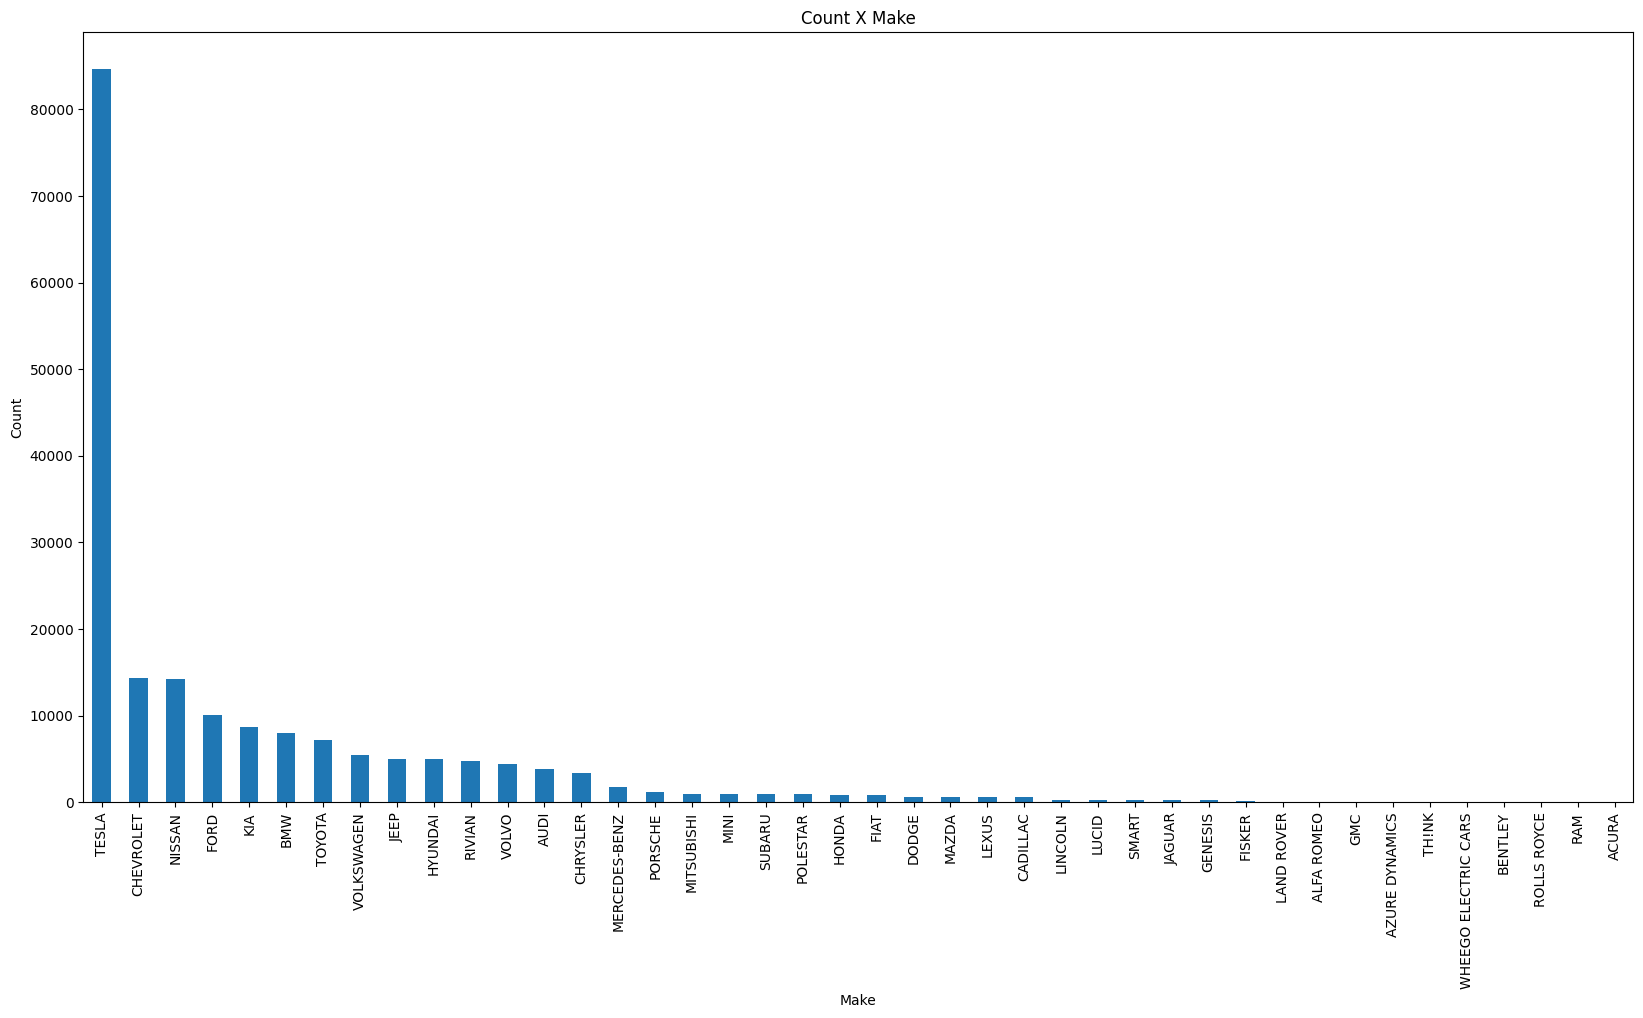

In [35]:
import matplotlib.pyplot as plt
# crie um grafico de Coluna para Make e contagem de linhas por Make
df['Make'].value_counts().plot.bar(figsize=(20,10))
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Count X Make')

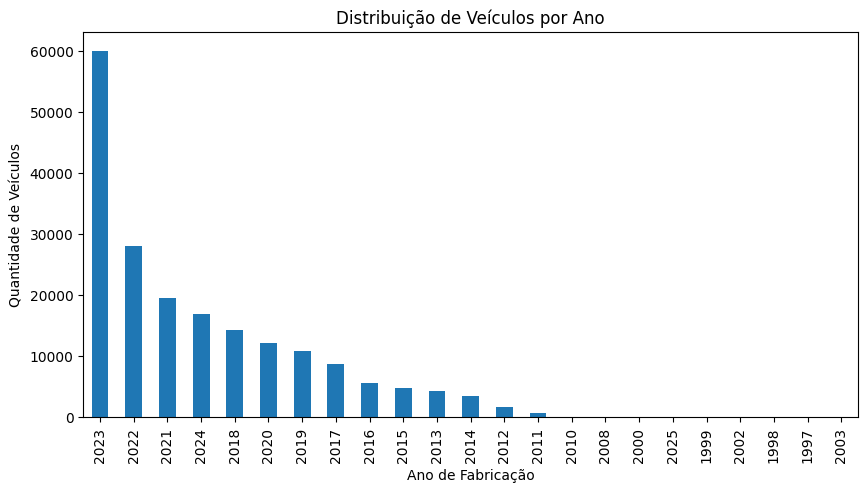

In [45]:
#Distribuição de Veículos por Ano: Quantidade de veículos de cada ano de fabricação
count_by_year = df['Model Year'].value_counts()

count_by_year.plot.bar(figsize=(10,5))

plt.xlabel('Ano de Fabricação')
plt.ylabel('Quantidade de Veículos')
plt.title('Distribuição de Veículos por Ano')
plt.show()

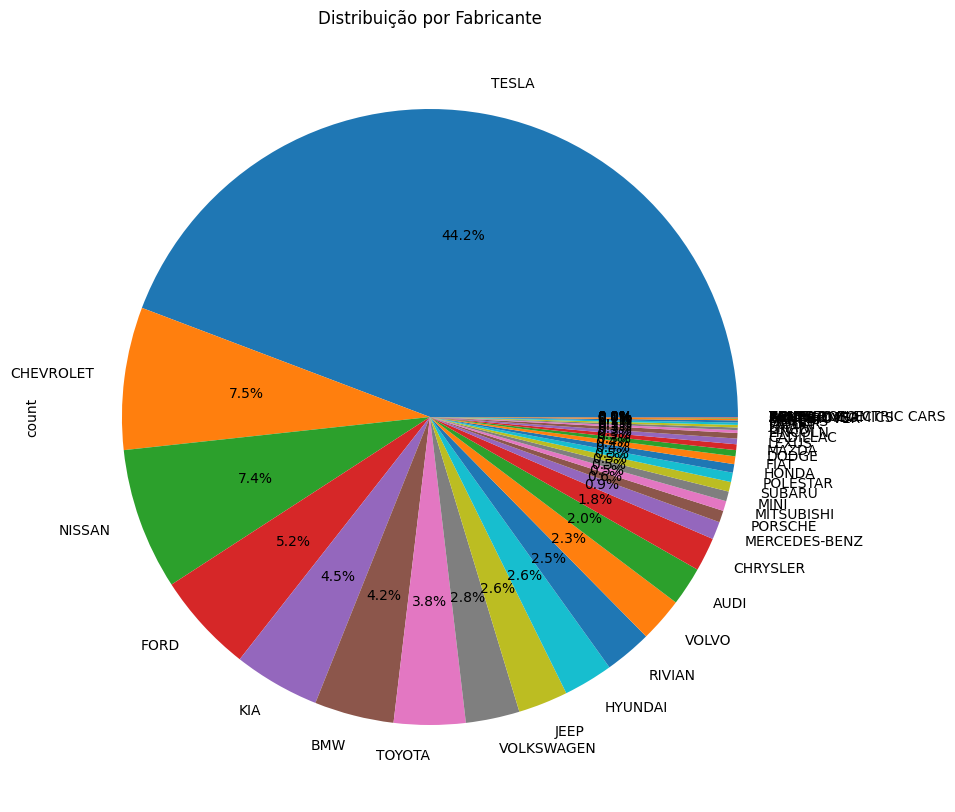

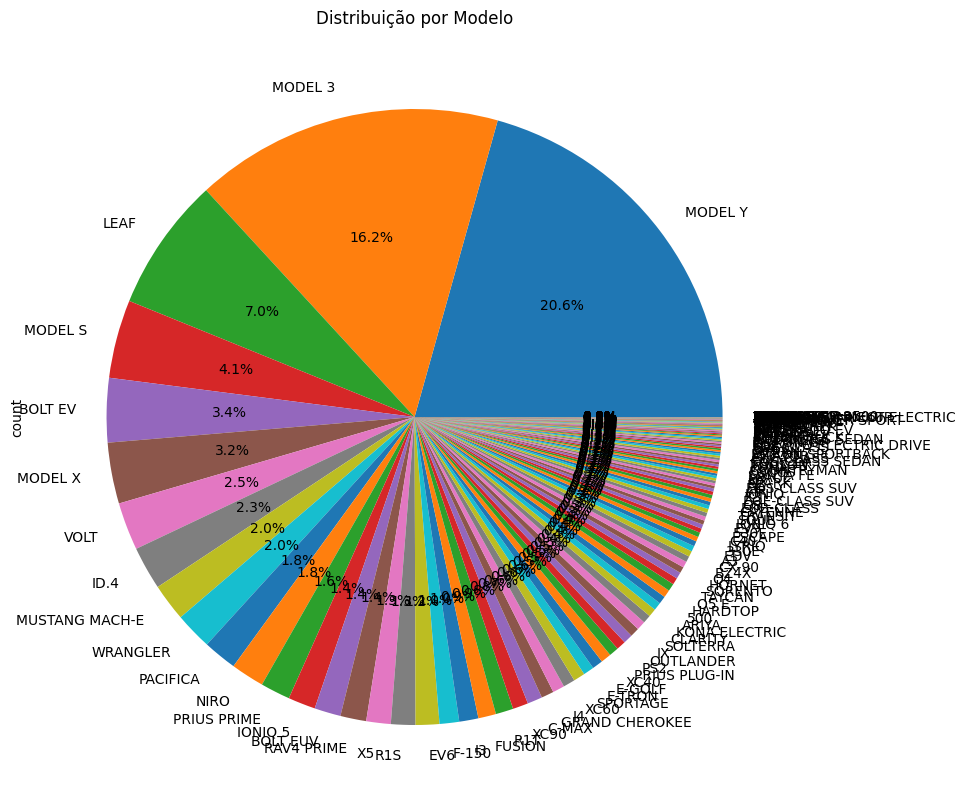

In [53]:
#Distribuição por Fabricante e Modelo: Frequência de cada fabricante e modelo de veículo.
fabricante = df['Make'].value_counts()
fabricante.plot.pie(figsize=(10,10),autopct='%1.1f%%')
plt.title('Distribuição por Fabricante')
plt.show()
modelo=df['Model'].value_counts()
modelo.plot.pie(figsize=(10,10),autopct='%1.1f%%')
plt.title('Distribuição por Modelo')
plt.show()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            149687
Plug-in Hybrid Electric Vehicle (PHEV)     41720
Name: count, dtype: int64


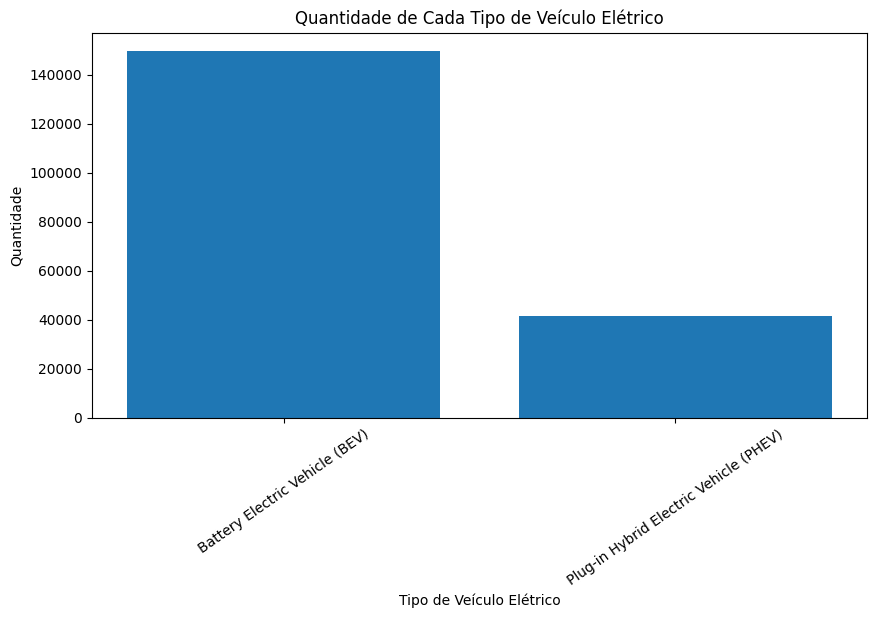

In [65]:
# Tipos de Veículos Elétricos: Quantidade de cada tipo de veículo elétrico (BEV vs PHEV)
# Electric Vehicle Type

tipo_veiculo_contagem = df['Electric Vehicle Type'].value_counts()
print(tipo_veiculo_contagem)
plt.figure(figsize=(10, 5))
plt.bar(tipo_veiculo_contagem.index, tipo_veiculo_contagem.values)
plt.title('Quantidade de Cada Tipo de Veículo Elétrico')
plt.xlabel('Tipo de Veículo Elétrico')
plt.ylabel('Quantidade')
plt.xticks(rotation=35)
plt.show()